<a href="https://colab.research.google.com/github/Nick-FF/Python_Lib/blob/lesson4/Learn_w_teacher.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd

In [ ]:
from sklearn.datasets import load_boston

In [ ]:
boston = load_boston()

In [5]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
data=boston.data

In [8]:
feature_names=boston.feature_names
X=pd.DataFrame(boston.data, columns=feature_names)

In [9]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [10]:
y=pd.DataFrame(boston.target, columns=['price'])
y.head()

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.3, random_state = 42 )

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
lr = LinearRegression()

In [14]:
lr.fit(X_train, y_train) #метод fit построение (тренировка) модели. Передаем тренировочные наборы данных

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
y_pred = lr.predict(X_test) #проверка модели на тестовых данных методом .predict. массив предсказанных цен сохранен в y_pred

In [16]:
chec_test = pd.DataFrame({'y_test': y_test['price'], 'y_pred': y_pred.flatten()}, columns=['y_test', 'y_pred'])

In [17]:
chec_test.head(10)

,y_test,y_pred
173,23.6,28.648960
274,32.4,36.495014
491,13.6,15.411193
72,22.8,25.403213
452,16.1,18.855280
76,20.0,23.146689
316,17.8,17.392124
140,14.0,14.078599
471,19.6,23.036927
500,16.8,20.599433


In [18]:
from sklearn.metrics import r2_score

In [19]:
r2_score(y_test, y_pred)

0.7112260057484974

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
%config Inlinebackend.figure_format = 'svg'

Text(0, 0.5, 'Признак')

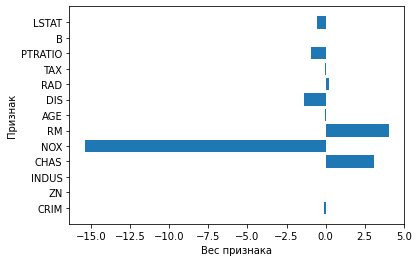

In [21]:
plt.barh(X_train.columns, lr.coef_.flatten())
plt.xlabel('Вес признака')
plt.ylabel('Признак')

In [22]:
X1 = X.drop('NOX', 1) #попытка убрать признак с самым малым весом
X1.head(4)

,CRIM,ZN,INDUS,CHAS,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size =0.44, random_state = 42 )

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
lr = LinearRegression()

In [26]:
lr.fit(X_train, y_train) #метод fit построение (тренировка) модели. Передаем тренировочные наборы данных

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
y_pred = lr.predict(X_test) #проверка модели на тестовых данных методом .predict. массив предсказанных цен сохранен в y_pred

In [28]:
chec_test = pd.DataFrame({'y_test': y_test['price'], 'y_pred': y_pred.flatten()}, columns=['y_test', 'y_pred'])

In [29]:
chec_test.head(10)

,y_test,y_pred
173,23.6,28.369250
274,32.4,36.855663
491,13.6,12.955072
72,22.8,25.080189
452,16.1,18.982822
76,20.0,20.958990
316,17.8,17.096819
140,14.0,12.944422
471,19.6,20.767531
500,16.8,21.026255


In [30]:
from sklearn.metrics import r2_score

In [31]:
r2_score(y_test, y_pred) #при тех же начальных условиях результат оказался несколько хуже чем у модели с призаком NOX, хотя на первый взгляд ошибка (y_test-y_pred) уменьшилась
# поисле поиска объема величины обучающей выборки 44% качество модели повысилось с 0,69 до 0,719

0.719221030704797

In [32]:
import matplotlib.pyplot as plt


Text(0, 0.5, 'Признак')

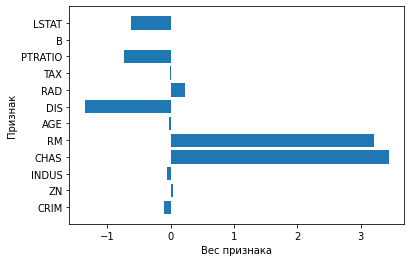

In [33]:
plt.barh(X_train.columns, lr.coef_.flatten())
plt.xlabel('Вес признака')
plt.ylabel('Признак')

Задание 2
Случайны лес

In [34]:
from sklearn.ensemble import RandomForestRegressor

In [35]:
from sklearn.model_selection import GridSearchCV

In [36]:
parameters =[{'n_estimators': [1000], 'max_features': np.arange(5,9), 'max_depth': [12]}]

In [37]:
clf = GridSearchCV(estimator=RandomForestRegressor(random_state=42), param_grid=parameters, cv=5)

In [38]:
regr=RandomForestRegressor()
regr.fit(X_train, y_train.values[:,0])
y_pred = regr.predict(X_test)

In [39]:
r2_score(y_test, y_pred)

0.8715860744411427

Результат метода случайны лес заметно выше

Задание 3

In [40]:
# ?RandomForestRegressor

In [41]:
# X, y = make_regression(n_features=4, n_informative=2, random_state=0, shuffle=False)
# regr = RandomForestRegressor(max_depth=2, random_state=0)
# regr.fit(X, y)
print(regr.feature_importances_)
print(regr.predict([[0, 0, 0,0,0,0,0,0,0,0,0,0]]))

[0.04273685 0.0025143  0.00613935 0.00082589 0.40020033 0.02166724
 0.05817104 0.0054161  0.0138179  0.01911019 0.01491151 0.41448931]
[39.434]


In [42]:
columns=feature_names
columns

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [43]:
c=pd.DataFrame(regr.feature_importances_)
c

,0
0,0.042737
1,0.002514
2,0.006139
3,0.000826
4,0.400200
5,0.021667
6,0.058171
7,0.005416
8,0.013818
9,0.019110


In [44]:
from google.colab import drive
drive.mount('/gdrive')


Mounted at /gdrive


In [58]:
dff=pd.read_csv('/gdrive/MyDrive/Colab Notebooks/creditcard.csv', sep=',')
dff.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0


In [67]:
dff.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class     float64
dtype: object

In [70]:
dff.isna().tail

<bound method NDFrame.tail of          Time     V1     V2     V3     V4     V5     V6     V7     V8     V9  \
0       False  False  False  False  False  False  False  False  False  False   
1       False  False  False  False  False  False  False  False  False  False   
2       False  False  False  False  False  False  False  False  False  False   
3       False  False  False  False  False  False  False  False  False  False   
4       False  False  False  False  False  False  False  False  False  False   
...       ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
227806  False  False  False  False  False  False  False  False  False  False   
227807  False  False  False  False  False  False  False  False  False  False   
227808  False  False  False  False  False  False  False  False  False  False   
227809  False  False  False  False  False  False  False  False  False  False   
227810  False  False  False  False  False  False  False  False  False  False   

         

In [72]:
dff.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    1
Class     1
dtype: int64

In [74]:
medians = dff[['Amount', 'Class']].median()
medians

Amount    23.41
Class      0.00
dtype: float64

In [77]:
dff[['Amount', 'Class']] = dff[['Amount', 'Class']].fillna(medians)
dff.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [78]:
dff.value_counts(normalize=True)

Time     V1          V2          V3         V4         V5         V6         V7          V8          V9         V10         V11        V12        V13        V14        V15        V16        V17        V18        V19        V20        V21         V22        V23        V24        V25        V26        V27        V28        Amount  Class
43153.0  -2.086016    2.203265    1.654339   2.941050  -1.683045   0.529728  -1.352162    1.793449   -0.723686   0.600365   -0.982212  -0.551636  -1.337000   0.834403   1.251862   0.033455   1.067978   0.160510   0.213087   0.079002   0.216444    0.567241  -0.035345   0.370201   0.157378   0.440341   0.210230   0.090558  0.76    0.0      0.000040
68207.0  -13.192671   12.785971  -9.906650   3.320337  -4.801176   5.760059  -18.750889  -37.353443  -0.391540  -5.052502    4.406806  -4.610756  -1.909488  -9.072711  -0.226074  -6.211557  -6.248145  -3.149247   0.051576  -3.493050   27.202839  -8.887017   5.303607  -0.639435   0.263203  -0.108877   1.269566   0

In [79]:
pd.options.display.max_columns = 100
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227811 entries, 0 to 227810
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    227811 non-null  float64
 1   V1      227811 non-null  float64
 2   V2      227811 non-null  float64
 3   V3      227811 non-null  float64
 4   V4      227811 non-null  float64
 5   V5      227811 non-null  float64
 6   V6      227811 non-null  float64
 7   V7      227811 non-null  float64
 8   V8      227811 non-null  float64
 9   V9      227811 non-null  float64
 10  V10     227811 non-null  float64
 11  V11     227811 non-null  float64
 12  V12     227811 non-null  float64
 13  V13     227811 non-null  float64
 14  V14     227811 non-null  float64
 15  V15     227811 non-null  float64
 16  V16     227811 non-null  float64
 17  V17     227811 non-null  float64
 18  V18     227811 non-null  float64
 19  V19     227811 non-null  float64
 20  V20     227811 non-null  float64
 21  V21     22

In [80]:
Z=dff.drop('Class',1)

In [81]:
q=dff['Class']
q

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
227806    0.0
227807    0.0
227808    0.0
227809    0.0
227810    0.0
Name: Class, Length: 227811, dtype: float64

In [82]:
Z_train, Z_test, q_train, q_test = train_test_split(Z, q, test_size =0.3, random_state = 100)

In [83]:
Z_train.info(), Z_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159467 entries, 58662 to 38408
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    159467 non-null  float64
 1   V1      159467 non-null  float64
 2   V2      159467 non-null  float64
 3   V3      159467 non-null  float64
 4   V4      159467 non-null  float64
 5   V5      159467 non-null  float64
 6   V6      159467 non-null  float64
 7   V7      159467 non-null  float64
 8   V8      159467 non-null  float64
 9   V9      159467 non-null  float64
 10  V10     159467 non-null  float64
 11  V11     159467 non-null  float64
 12  V12     159467 non-null  float64
 13  V13     159467 non-null  float64
 14  V14     159467 non-null  float64
 15  V15     159467 non-null  float64
 16  V16     159467 non-null  float64
 17  V17     159467 non-null  float64
 18  V18     159467 non-null  float64
 19  V19     159467 non-null  float64
 20  V20     159467 non-null  float64
 21  V21    

(None, None)

In [84]:
parameters =[{'n_estimators': [10,15], 'max_features': np.arange(3,5), 'max_depth': np.arange(4,7)}]
clf2 = GridSearchCV(estimator=RandomForestClassifier(random_state=100), param_grid=parameters, scoring='roc_auc', cv=3)

In [86]:
clf2.fit(Z_train, q_train)


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=100,
                                 

In [89]:
clf2.best_params_

{'max_depth': 6, 'max_features': 4, 'n_estimators': 15}

In [101]:
q_test= np.array(q_test).reshape(1,-1)
q_test

array([[0., 0., 0., ..., 0., 0., 0.]])

In [102]:
y2_pred = clf2.predict_proba(q_test)

ValueError: ignored

тут забуксовал, что-то пошло не так

In [1]:
from sklearn.metrics import roc_auc_score